## predict clusters

In [2]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import log_loss
import plotly.io as pio

## import scaled dataframe

In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)
dataset = pd.read_csv("/Users/erikmichels/Desktop/PhD/Lymfo/dataframe.csv", sep = ",", decimal=".")                                   
dataset.head()

,Unnamed: 0,Tie_2,E_selectin,Thrombomodulin,VCAM_1,Syndecan_1,PAI_1,CD_31,RAGE,TNF_alpha,Tenascin_C,SP_D,TNF_RI,CD40L,Granzyme_B,PD_L1,IFNg,IL1RA,IL_1alpha,IL_1beta,IL2,IL4,IL6,IL7,IL10,IL12,IL13,IL15,IL17a,IL33,CCL3,CCL2,CCL4,CXCL8,CCL5,CXCL10,Cluster
0,35925,1.339161,0.433574,-0.175778,0.475840,-0.334483,-0.041856,0.090635,0.391241,-0.794745,0.960711,-1.466011,-0.462530,-0.972146,-1.842308,0.188380,-1.445001,-0.441824,0.788990,0.095500,0.228301,0.496582,-0.009042,0.204574,0.200789,0.254457,0.676257,0.358483,0.698058,0.593657,-0.678960,-0.246297,0.233279,0.297069,0.757200,0.002421,1
1,197325,-0.074949,-0.587430,0.473249,-0.056366,-0.399932,0.023877,0.555937,0.140157,0.450693,-1.036433,0.635301,-0.162576,-2.101858,-0.973700,-0.569607,-0.074390,-0.421058,-0.304443,-0.544001,-0.637251,-0.067657,2.537599,0.251530,0.800802,-0.499405,-0.622294,-0.454351,-0.511075,-0.869665,0.618804,1.359017,-0.624103,0.841880,-0.839930,0.016748,1
2,467102,0.283346,-0.653802,-0.410693,-1.082741,0.658721,1.031185,0.028756,-0.861485,0.550972,-0.534472,1.297214,-0.305444,1.279503,0.424081,-0.502963,-0.227725,-1.369803,0.602104,0.847757,1.197491,0.916615,-0.203518,0.410530,-1.385620,0.831474,0.758829,0.145023,0.675779,0.616848,0.180959,-1.208934,0.814398,-0.958581,0.928781,-1.517783,2
3,468691,2.901641,1.242547,-0.506913,0.633648,-0.473881,-0.468697,-0.694863,0.955459,-0.469126,-0.241794,-0.807001,0.660058,-0.380235,-1.158038,0.423674,1.429752,1.567279,-0.561836,-0.190991,-0.133538,-0.072744,0.459506,-0.550214,0.013296,-1.088822,-0.167301,-0.340876,-0.317105,0.038575,-1.440309,-0.192319,-0.515158,-0.040966,-0.158977,1.166233,1
4,1083471,-1.914636,-0.291949,0.779606,0.325827,-0.002854,0.089269,-1.149086,-0.255519,0.371244,2.532023,0.511940,1.237694,-0.741711,-2.032666,-3.069350,-1.187363,0.560270,-1.161501,-0.740768,-0.026493,-1.126356,-0.432540,0.365270,1.538901,0.752735,-0.918277,0.678470,-1.720409,-0.875515,-0.346777,-0.656157,0.312116,-1.116983,-0.743350,1.000460,1


In [4]:
dataset.describe()
dataset.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
dataset.dtypes

Tie_2             float64
E_selectin        float64
Thrombomodulin    float64
VCAM_1            float64
Syndecan_1        float64
PAI_1             float64
CD_31             float64
RAGE              float64
TNF_alpha         float64
Tenascin_C        float64
SP_D              float64
TNF_RI            float64
CD40L             float64
Granzyme_B        float64
PD_L1             float64
IFNg              float64
IL1RA             float64
IL_1alpha         float64
IL_1beta          float64
IL2               float64
IL4               float64
IL6               float64
IL7               float64
IL10              float64
IL12              float64
IL13              float64
IL15              float64
IL17a             float64
IL33              float64
CCL3              float64
CCL2              float64
CCL4              float64
CXCL8             float64
CCL5              float64
CXCL10            float64
Cluster             int64
dtype: object

In [6]:
import numpy as np
X_train = dataset.loc[:, dataset.columns != "Cluster"]
y_train = dataset.loc[:, dataset.columns == "Cluster"].values.ravel()

y_train = pd.Series(y_train)

In [7]:
y_train

0      1
1      1
2      2
3      1
4      1
      ..
267    0
268    1
269    2
270    0
271    1
Length: 272, dtype: int64

In [8]:
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [10]:
# in brackets all the tried parameters
params = {'learning_rate':[0.01, 0.05, 0.1], 
          'gamma':[1.25, 1.5, 1.75, 2], 
          'min_child_weight': [0.5, 0.75, 1, 5, 10], 
          'max_depth':[3, 5, 7], 
          'subsample':[0.1, 0.5, 1.0], 
          'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1.0], 
          'colsample_bylevel': [0.4, 0.6, 0.8, 1.0], 
          'num_class': [3]
}

## Hypertuning with cross validation

In [11]:
cv = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)

In [ ]:
%time cv.fit(X_train, y_train)
model = cv.best_estimator_
print(cv.best_params_)

## Cross validation and hypertuning results

In [28]:
model = XGBClassifier(learning_rate = 0.01,
          gamma = 1.5,
          min_child_weight = 1,
          max_depth = 5, 
          subsample = 0.5, 
          colsample_bytree = 0.4, 
          colsample_bylevel = 0.6, 
          objective='multi:softprob')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [29]:
y_pred = model.predict(X_train)

In [30]:
y_pred

array([1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 1,
       1, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1,
       0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0, 1,
       2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0,
       0, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1,
       1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2,
       1, 0, 2, 0, 1, 2, 0, 1])

## Check accuracy in discovery cohort

In [31]:
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9742647058823529

## Further evaluate model

In [32]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# Overall feature importance

In [33]:
import shap

In [34]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_train)

Permutation explainer: 273it [00:22,  6.61it/s]                         


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


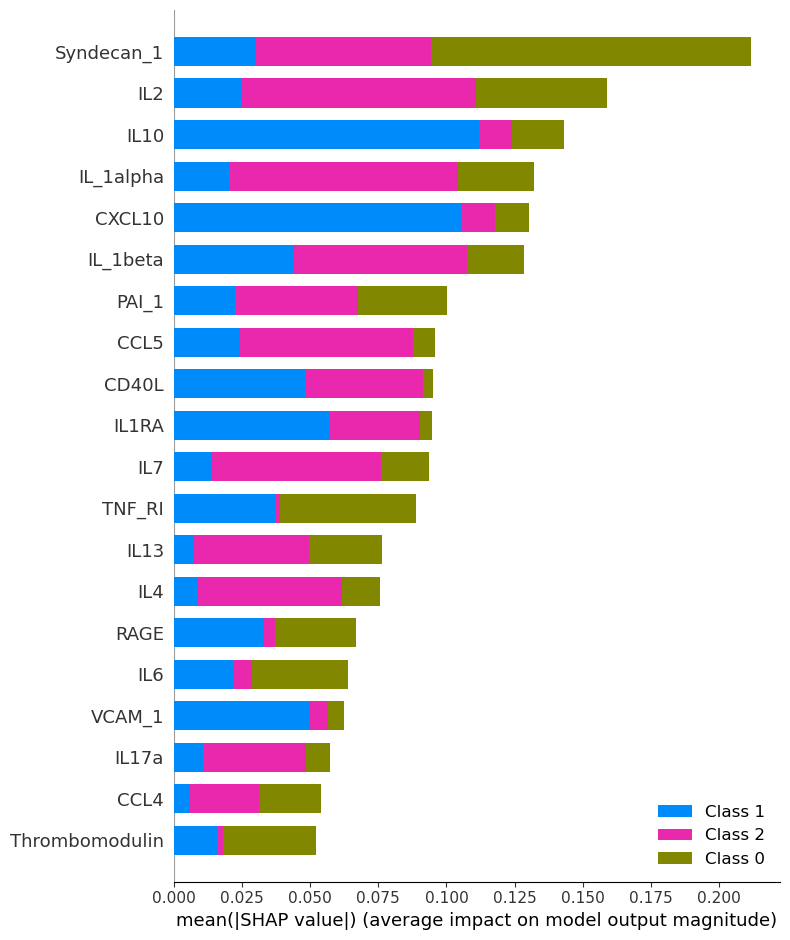

In [35]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train, approximate = True)
shap.summary_plot(shap_values, X_train, plot_type="bar")

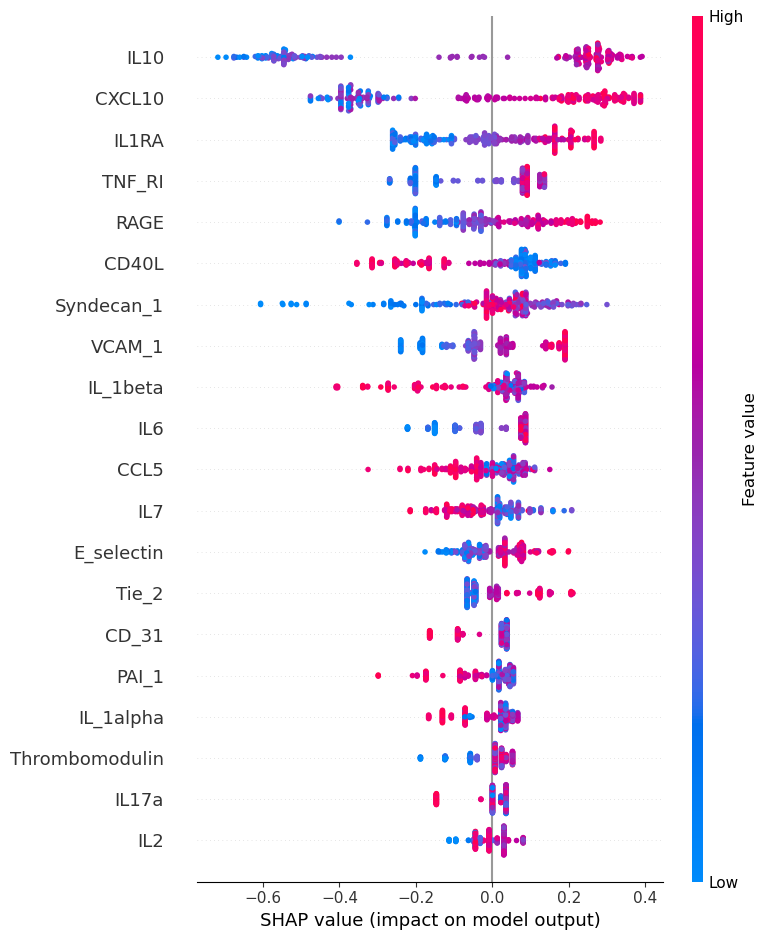

In [21]:
## Class 1
shap.summary_plot(shap_values[1], X_train)

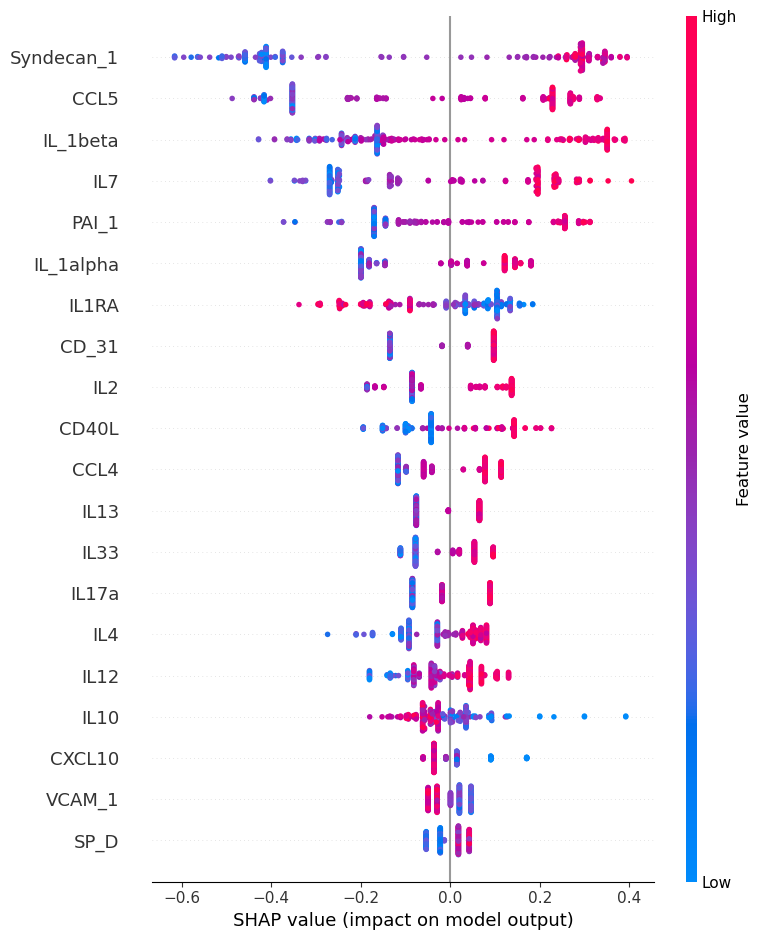

In [22]:
## Class 2
shap.summary_plot(shap_values[2], X_train)

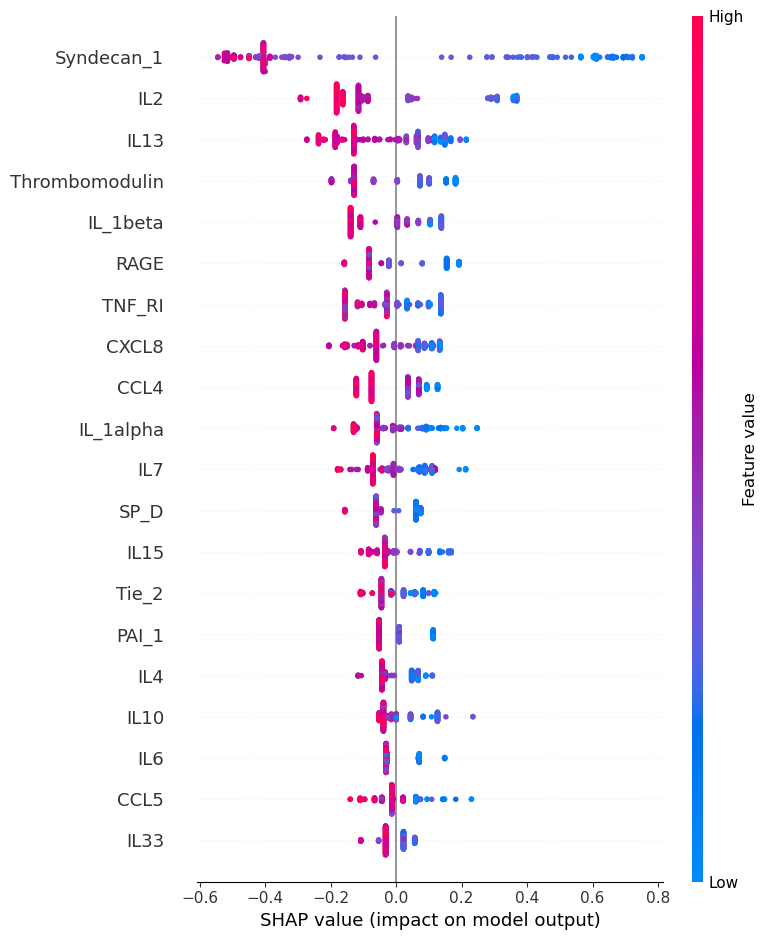

In [23]:
## Class 3
shap.summary_plot(shap_values[0], X_train)

In [36]:
git clone <https://github.com/ErikMichels/AJRCCM_lymphopenia.git>

SyntaxError: invalid syntax (1554434220.py, line 1)